In [138]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

import warnings
warnings.filterwarnings('ignore')

In [139]:
%load_ext autoreload
%autoreload 2
%run '../../../main.py'


from lib.helper import Functions
from lib.store.influxstore import InfluxStore
from lib.logic.TakeAlgorithm import TakeAlgorithm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
dataSetOps = DataSetOps()

# dataSetOps.import_data_set('/media/taleh/TIsStorage/archive/finance-data/currency/Historical/EURUSD/DAT_ASCII_EURUSD_M1_201902.csv')
dataSetOps.import_years(2018, 2018)
dataSetOps.prepare10Min()

df = dataSetOps.df

In [86]:
simple_sell_value_algo = TakeAlgorithm.pdTake('simple', action='sell', spread=2, takeProfit=1, stopLose=3)
simple_buy_value_algo = TakeAlgorithm.pdTake('simple', action='buy', spread=2, takeProfit=1, stopLose=3)

df['simple_sell_value'] = df.apply(simple_sell_value_algo, axis=1)
df['simple_buy_value'] = df.apply(simple_buy_value_algo, axis=1)



In [141]:
TakeAlgorithm.metrics(df, 'simple', spread=2, takeProfit=10, stopLose=10)

count df 37194
count simple_sell_value 9609
count simple_buy_value 9535
count both 0
count none 18050
sum simple_sell_value -8.034789999999965
sum simple_buy_value -8.162150000000045


In [143]:
TakeAlgorithm.pdCalc(df, 'simple', spread=2, takeProfit=5, stopLose=5, inplace=True)

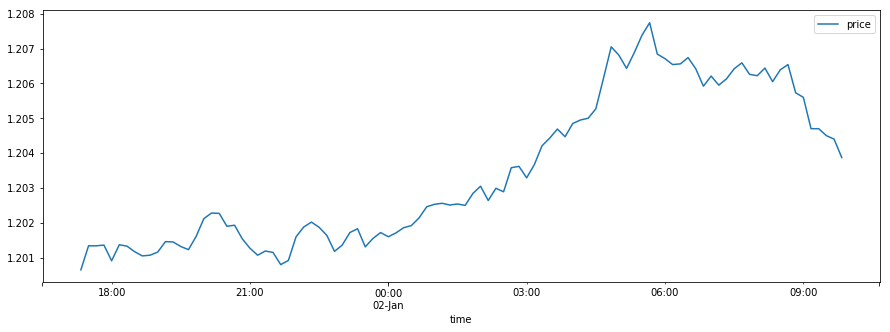

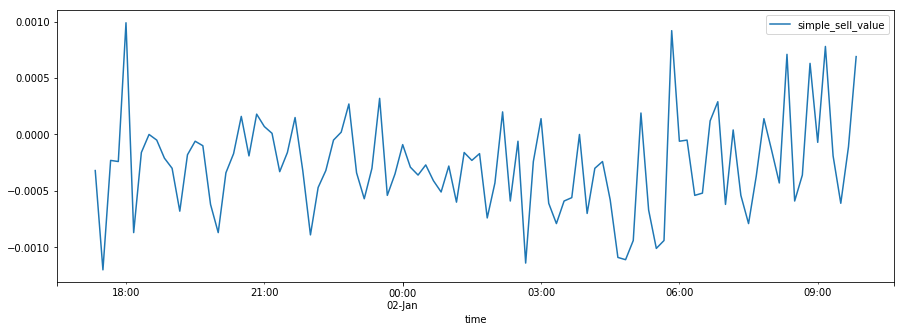

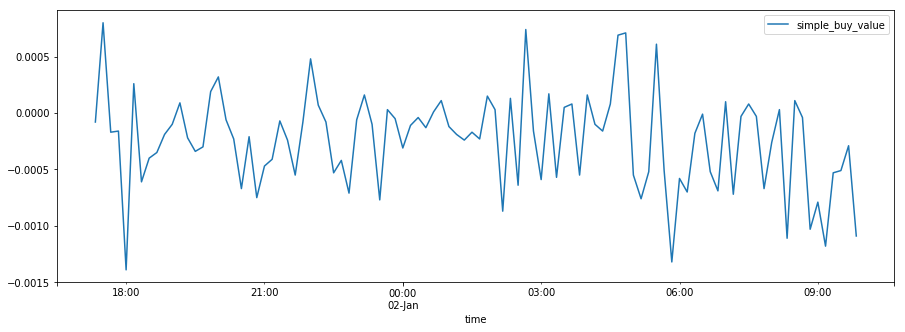

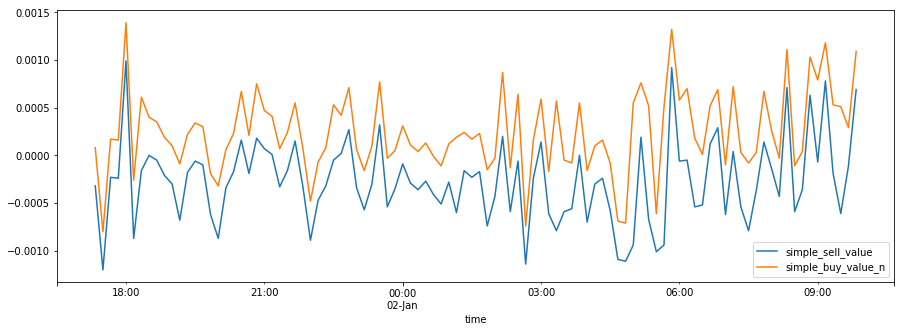

In [149]:
df[['price']].head(100).plot()
df[['simple_sell_value']].head(100).plot()
df[['simple_buy_value']].head(100).plot()
df['simple_buy_value_n'] = 0 - df['simple_buy_value']
df[['simple_sell_value', 'simple_buy_value_n']].head(100).plot()

In [152]:
len(df[df['simple_buy_value'] > 0]) / len(df)

0.23073614023767275

In [200]:
for i in range(1, 20):
    def func1(arr):
        for elem in arr:
           if elem > 0:
            return 1
        return 0

    df['a'] = df['simple_sell_value'].rolling(window=i).apply(func1)
    df.dropna(inplace=True)
    print(i, len(df[df['a'] == 0]) / (len(df[df['a'] == 1]) + len(df[df['a'] == 0])))

1 0.7645307933759065
2 0.5876065485049384
3 0.4537926555354099
4 0.35456021650879566
5 0.28003031451307314
6 0.22443897024985787
7 0.181778800595641
8 0.1483698006932409
9 0.12191224268689058
10 0.10127062393324483
11 0.08417116067315249
12 0.07029005150447276
13 0.05865285536091979
14 0.04888105248881053
15 0.04086727632900057
16 0.03420566836790097
17 0.028544269418794132
18 0.023802407412439202
19 0.019899415522631508


0.10138174374444474